In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

In [ ]:
mat = loadmat("/content/ex7data2.mat")
X = mat["X"]

In [3]:
# Initialize Centroids randomly
import random
init_centroids = random.sample(range(0,len(X)), 3)
init_centroids

[280, 197, 66]

In [4]:
centroids = []
for i in init_centroids:
  centroids.append(X[i])

centroids

[array([6.5870565 , 3.37508345]),
 array([2.07291709, 1.16763851]),
 array([2.26901428, 4.61818883])]

In [5]:
def calc_dist(x1,x2):
  return (sum((x1 - x2)**2))**0.5

In [6]:
def find_closest_centroid(centroid,X):
  assigned_centroid = []

  for i in X:
    distance = []
    for j in centroid:
      distance.append(calc_dist(i,j))
    assigned_centroid.append(np.argmin(distance))

  return assigned_centroid

In [7]:
find_closest_centroid(centroids,X)

[np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.in

In [8]:
# Mean of the observations falling in each cluster category
def new_centroid(centroid,X):
  new_centroids = []
  new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(centroid, columns=['centroid'])], axis=1)

  for c in set(new_df['centroid']):
    current_cluster = new_df[new_df['centroid'] == c][new_df.columns[:-1]]
    new_mean = current_cluster.mean(axis = 0)
    new_centroids.append(new_mean)

  return new_centroids

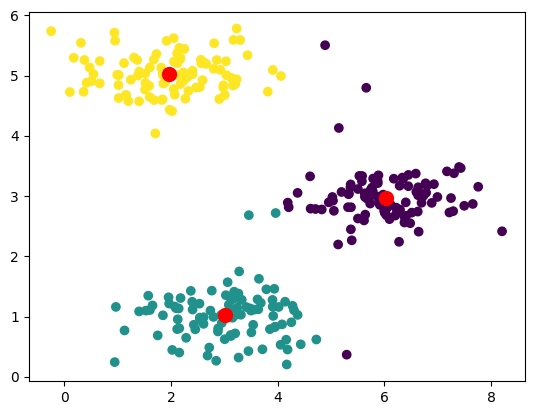

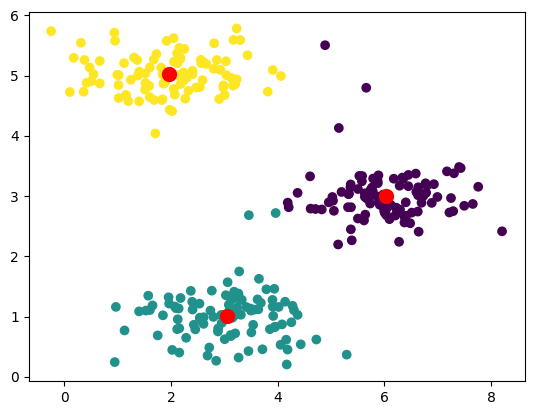

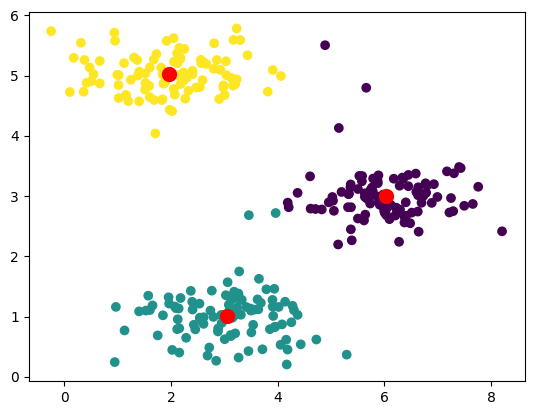

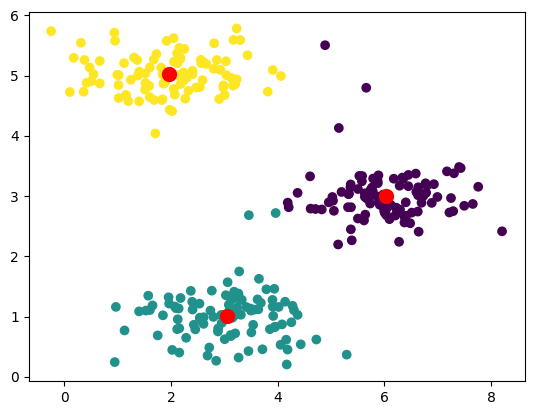

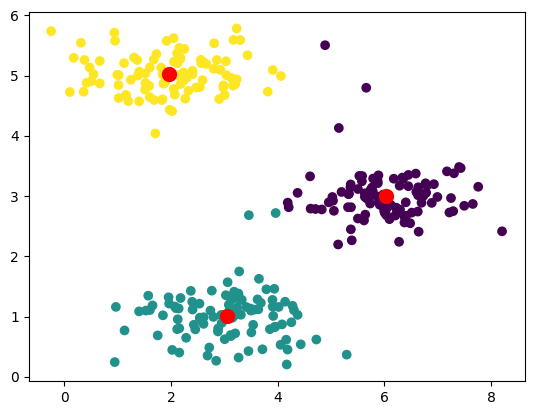

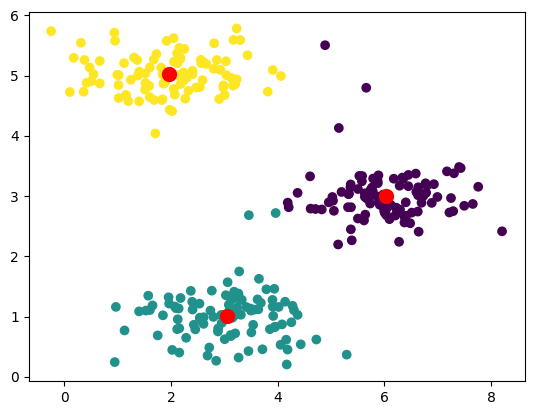

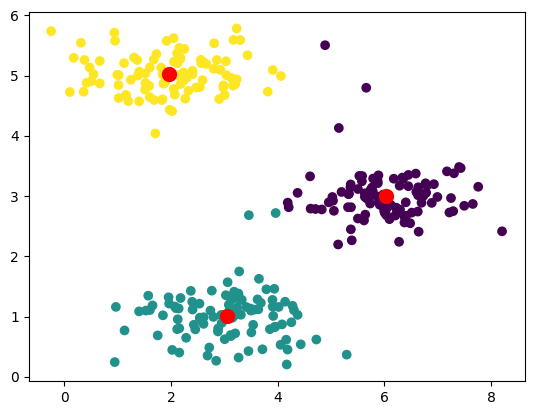

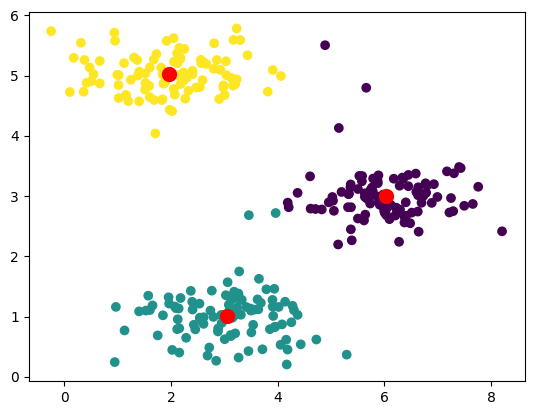

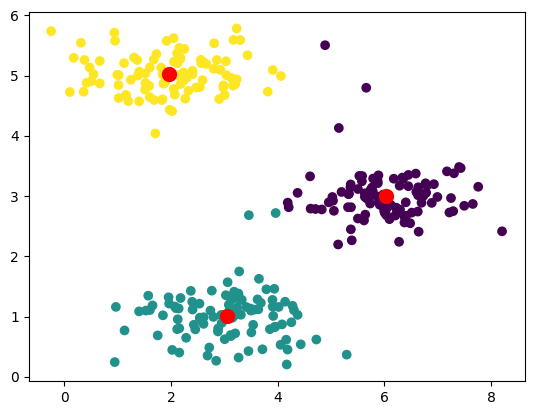

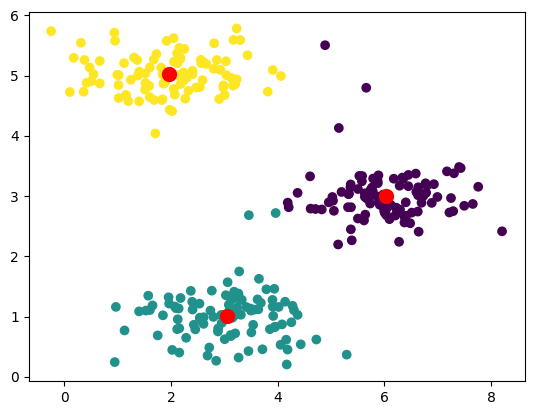

In [9]:
for i in range(10):
  obs_cen = find_closest_centroid(centroids,X)
  centroids = new_centroid(obs_cen,X)
  plt.figure()
  plt.scatter(X[:,0], X[:,1], c = obs_cen)
  plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1], color='red', s=100)
  plt.show()

array([[[165, 197, 220],
        [163, 199, 217],
        [151, 191, 203],
        ...,
        [ 44, 197, 252],
        [ 43, 195, 250],
        [ 44, 196, 251]],

       [[174, 206, 225],
        [171, 205, 221],
        [164, 203, 212],
        ...,
        [ 42, 197, 252],
        [ 42, 197, 252],
        [ 40, 195, 250]],

       [[185, 217, 230],
        [181, 216, 226],
        [179, 216, 224],
        ...,
        [ 32, 191, 247],
        [ 34, 197, 252],
        [ 33, 198, 253]],

       ...,

       [[ 60, 139, 158],
        [ 64, 143, 162],
        [ 66, 145, 164],
        ...,
        [ 96, 189, 210],
        [ 99, 189, 213],
        [ 97, 187, 211]],

       [[ 62, 139, 158],
        [ 63, 142, 161],
        [ 65, 144, 163],
        ...,
        [ 98, 191, 212],
        [101, 191, 215],
        [102, 192, 216]],

       [[ 64, 141, 160],
        [ 66, 143, 162],
        [ 66, 145, 164],
        ...,
        [ 99, 192, 213],
        [100, 190, 214],
        [ 98, 188, 212]]], dtype=uint8)
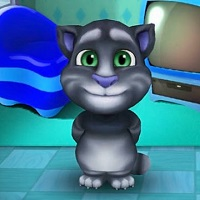

In [10]:
## Image Compression
import cv2
img = cv2.imread("/content/tom.jpeg")
img

In [11]:
im = (img/255).reshape(200*200, 3)

In [19]:
# Initialize centroids
import random
init_centroids = random.sample(range(0,len(im)), 6)

centroids = []
for i in init_centroids:
  centroids.append(im[i])

centroids

[array([0.24313725, 0.4745098 , 0.55294118]),
 array([0.29411765, 0.23137255, 0.20392157]),
 array([0.49803922, 0.4       , 0.36078431]),
 array([0.23921569, 0.77254902, 0.97647059]),
 array([0.58039216, 0.62745098, 0.66666667]),
 array([0.50196078, 0.50980392, 0.43137255])]

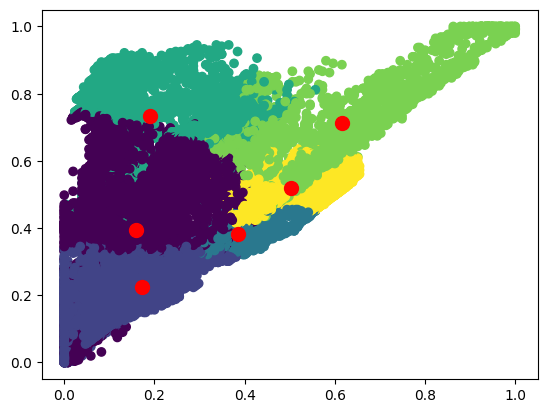

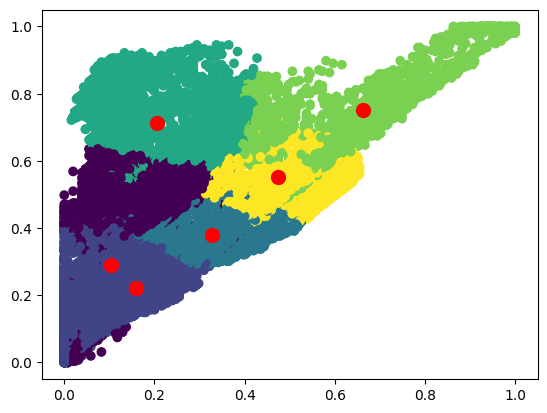

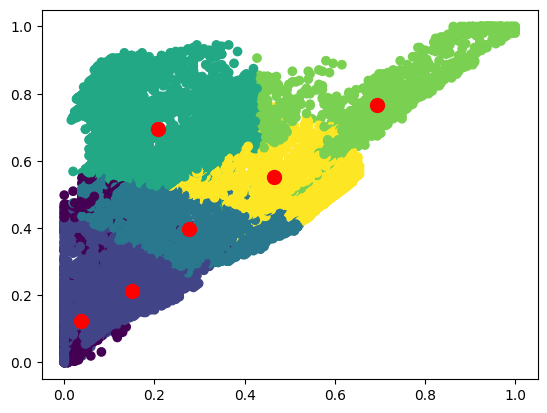

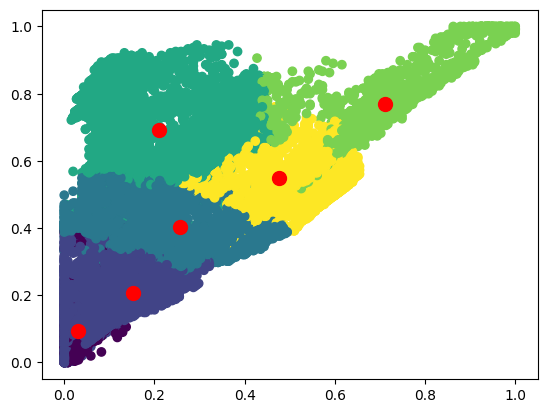

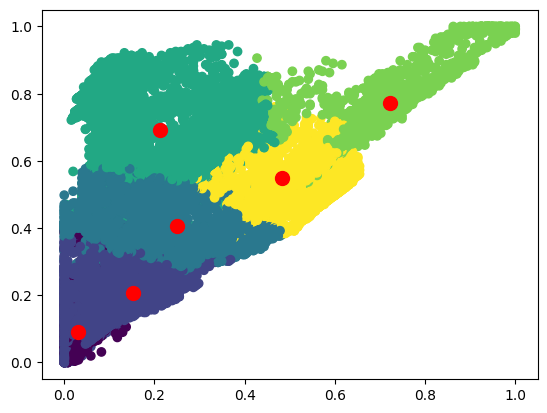

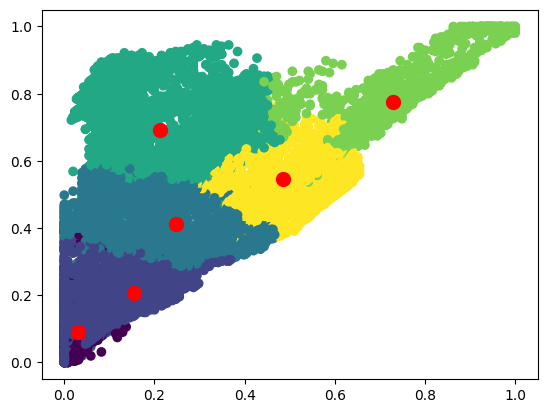

In [20]:
X = np.array(im)
for i in range(6):
  obs_cen = find_closest_centroid(centroids,X)
  centroids = new_centroid(obs_cen,X)
  plt.figure()
  plt.scatter(X[:,0], X[:,1], c = obs_cen)
  plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1], color='red', s=100)
  plt.show()

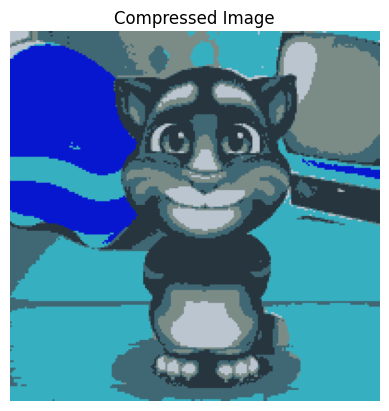

In [23]:
im_recovered = np.array(centroids)[obs_cen].reshape(200, 200, 3)
plt.imshow(im_recovered)
plt.axis('off')
plt.title('Compressed Image')
plt.show()